# 비지도 학습

1. 차원축소

   ex ) PCA

   

2. clustering

   ex) k-means clustering, mean shift, GMM

   

### 차원 축소

차원↑ → 계산량 ↑  → 컴퓨터 성능 좋아야함

학습 데이터 크기를 줄여 시간 절약



#### 종류

feature selection : 피처를 뽑아냄

feature extraciton : 피처를 뽑아서 새로 만들어냄



차원 축소를 통해 좀더 데이터를 잘 설명할 수 있는 요소로 바꿈



### PCA

원본 데이터 변동성이 큰 방향으로 축 생성 (eigen vector)

그 축으로 데이터 투영



공분산 행렬 :두 변수 간의 변동 / 변수 안의 데이터 수가 같아야 공분산 행렬이 가능해 진다.

선형 변환 : 특정벡터에서 새로운 벡터로 변환, 다시 원래대로 만들 수도 있다.

n_componets= : 차원 개수 설정

decomposition = factorization :박살내다. (재 조립x)

PCA를 하기전 스케일 변환 (정규화)를 하면 좋음



##### PCA 변환

입력데이터를 공분산행렬이 되어 고유벡터와 고유값으로 분해, 분해된 벡터를 이용해 선형 변환함.



절차

1. 입력데이터를 공분산 행렬로 생성

2. 고유베거 고유값 계산

3. 고유값이 큰 순으로 K개 만큼 고유벡터 추출

4. 고유값이 큰순으로 새롭게 입력 데이터를 변환

   

##### PCA 실습 - 아이리스

1. 정규화
2. PCA 수행(n_componets=2 - 차원 개수 2개로 설정)
3. 변환된 데이터 컬럼 명을 새로 명명
4. scatter로 시각화

5. PCA 수행 후 iris 데이터가  명확히 클러스터링 됨

*BUT, PCA 변환 차원 개수에 따라 예측 성능이 떨어지기도 한다. 그래서 한번 써봐야 안다.



고차원을 저차원으로 변환하면 데이터를 시각적을 표현하기 편해진다.


##### PCA 실습 - 신용카드

엑셀을 받아 올때는 sheet_name을 써야한다.
그리고 pip install xlrd를 해야한다.

heatmap을 이용하여 feature 상관관계를 시각적으로 파악할 수 있다.

속성을 뽑을 때 리스트로 뽑으려면 for문을 쓰면 된다.

랜덤 포레스트와 비교했을때 평균 정확도는 조금 떨어지지만 학습 속도는 확실히 빠르다.

jupyter 6.2


### LDA (Linear Discriminant Analysis)

비지도 학습이 아닌 지도학습이다.

PDA와 유사하지만 class 값을 넣어줘야 한다.

클래스 내부 행렬과 클래스 간 행렬을 합쳐서 고유벡터를 구한다.

잘 안씀

jupyter 6.3



### SVD (Singular Value Decomposition)

정방행렬 아니어도 가능 (행, 열 크기가 달라도 됨)

##### 활용

이미지 압축/ 변환

추천 엔진

문서 잠재 의미 분석

의사 역행렬(pseudeo code)을 통한 모델 예측



##### 유형

Full SVD : 완전복원가능

Compact SVD  : 시그마의 필요 없는 부분 제거하여 압축 / 완전복원 가능

Truncated SVD : 데이터의 상위 r개만 추출(추출을 할때 사용자에 따라 다를 수 있다.) /  완전복원 X  / 대신 축소된 데이터를 기반으로 복원하기 때문에 잡음을 제거할 수 있다. / Latent factor(잠재 요인)을 찾을 수 있다.



데이터가 많이 없는 분야에서 SVD를 이용하여 분석 가능

그러나 데이터가 많은 분야라면 이미 hidden pattern을 다 파악해놓고 있다.



차원 축소에서 pca가 가장 중요 그리고 svd는 덤으로

FULL SVD

In [2]:
import numpy as np
from numpy.linalg import svd

np.random. seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma value:\n',np.round(Sigma,3))
print('Vt matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma value:
 [3.423 2.023 0.463 0.079]
Vt matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [6]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


compact SVD

In [8]:
a[2] = a[0] + a[1]
a[3] = a[0]

print(np.round(a,3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [10]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma value:
 [2.663 0.807 0.    0.   ]


In [11]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


truncated svd

In [16]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 :', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('sigma 값 행렬:', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)
print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬 : [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
분해 행렬 차원: (6, 6) (6,) (6, 6)
sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]
nTruncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0

# 군집화(Clustering)

K-Means

Mean shift

gaussian mixture model

DBSCAN

### K-Means

군집 중심점을 기준으로 

중심점 개수를 지정해야함

장: 대표적 / 쉽다

단: outlier 데이터에 취약/ 속성 개수가 많을수록 정확도 떨어짐 /



class sklearn.cluster.KMeans(n_clusters = 군집개수, init='k-means++', max_iter= 반복횟수 )

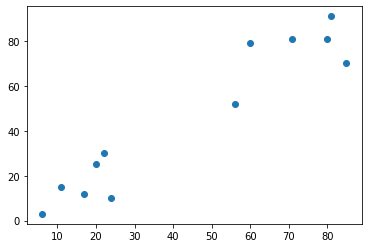

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[6,3], [11,15], [17,12], [24,10], [20,25], [22,30], [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

plt.scatter(X[:,0], X[:,1])

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[72.16666667 75.66666667]
 [16.66666667 15.83333333]]


[1 1 1 1 1 1 0 0 0 0 0 0]


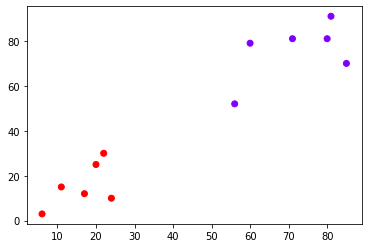

In [20]:
print(kmeans.labels_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

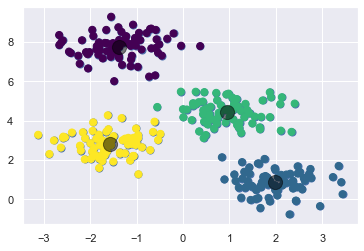

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50);

kmeans= KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);

###  Clustering 평가 ( 실루엣 분석)

군집내 데이터와 얼마나 가깝게 군집화 되어 있고 다른 군집에 있는 데이터와 얼마나 멀리 분리되어있는지 나타냄



실루엣 계수

- 1에 가까움 =  다른 군집과 멈

- 0에 가까움 = 다른 군집과 가까움

- 음수 값이면 다른 군집의 데이터를 가져온거임

### Mean shift

### KDE

### GMM

데이터 간 거리로 구하는 것이 아닌 데이터 분포로 구함

